# GCNによるKarateclub埋め込み

デフォルトはノード0,4,8,24が教師データ

! conda activate kmedoids

In [1]:

import time
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.datasets import KarateClub
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import gcn
from gcn import GCN
import numpy as np
from sklearn_extra.cluster import KMedoids #K-Medoids
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score #ARI
import random
import sys
from statistics import stdev
import warnings

warnings.filterwarnings("ignore")


/opt/anaconda3/envs/kmedoids/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
LOUVAIN = "LOUVAIN"
KARATE = "KARATE"
K4 = "K4"

In [3]:
# 実行回数
TIMES = 50

#すべてを学習データで学習させるか
TRAIN_ALL = False 

# デフォルトの一部の学習データ(ノード0,4,8,24)で学習させるか。Falseの場合ランダム
DEFAULT = False

#ランダムのデータで学習する場合の学習データ(ノード情報)数
NUM_TRAIN = 4

#エポック数
EPOCH = 50

#学習状況及び結果を図示するか
VIEW_TRAIN = False

#埋め込み結果、クラスタリング結果を表示するか
VIEW_CLUSTERING = True

#  クラスタ数
N_CLUSTER = 2

#GCNの学習に使う教師データ
TRUE_LABEL = gcn.draw_karateclub()

#クラスタリングに用いる手法
METHOD = "kmeans"

DATA = gcn.generate_Graph("karateclub")

#==========================================================

# 学習に用いるノードの数
num_node_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 34]

# エポック数
epoch_list = [200]



===========================1回目============================
埋め込み結果


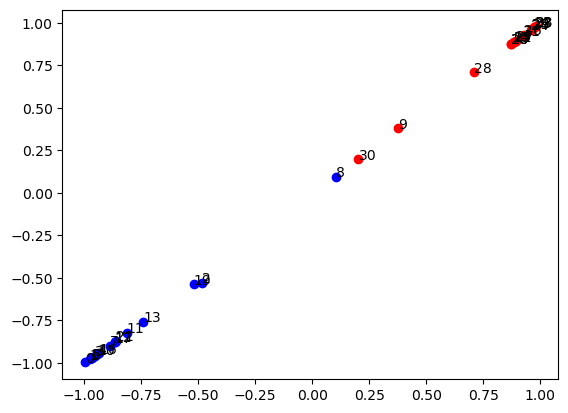

クラスタリング結果


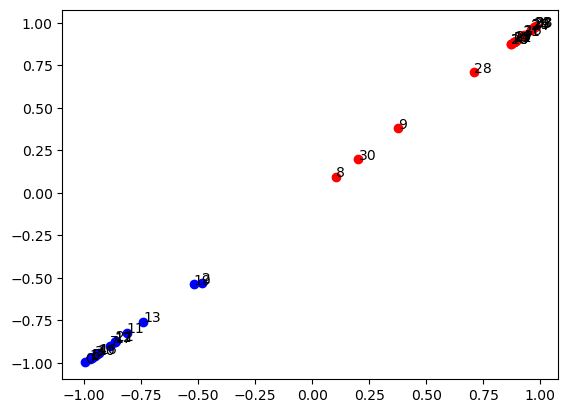

1回目 ARI : 0.8822575413558222
===========================2回目============================
埋め込み結果


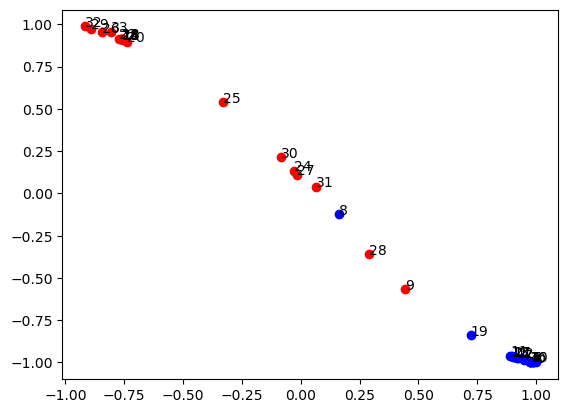

クラスタリング結果


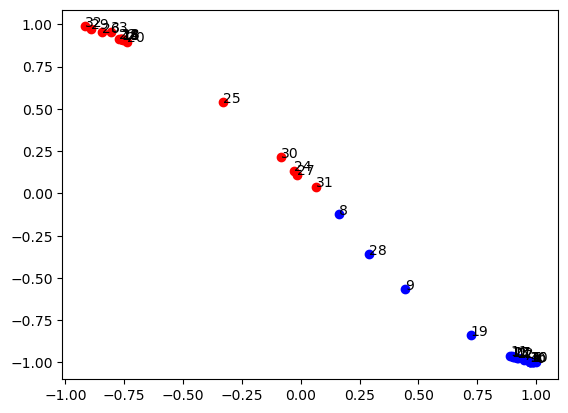

2回目 ARI : 0.7717250324254216
===========================3回目============================
埋め込み結果


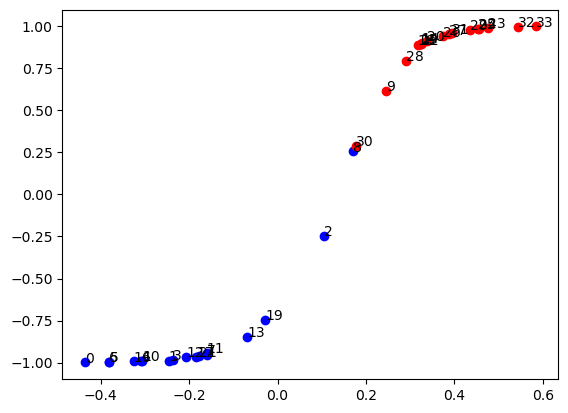

クラスタリング結果


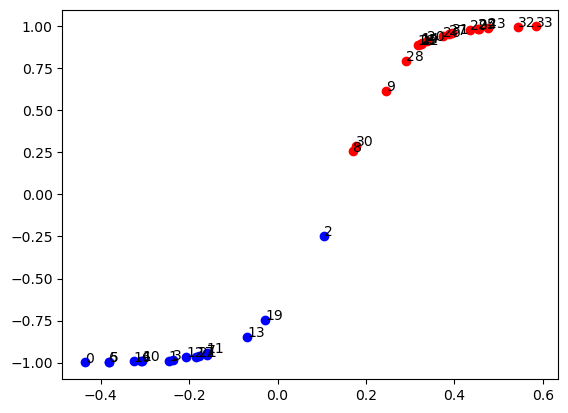

3回目 ARI : 0.8822575413558222
===========================4回目============================
埋め込み結果


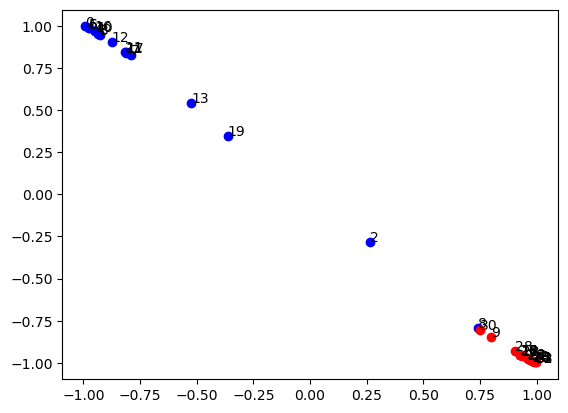

クラスタリング結果


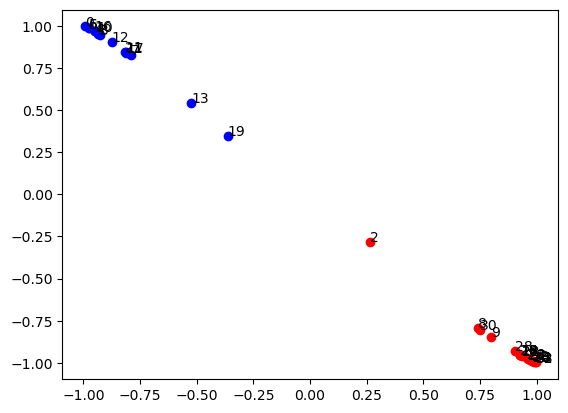

4回目 ARI : 0.7717250324254216
===========================5回目============================
埋め込み結果


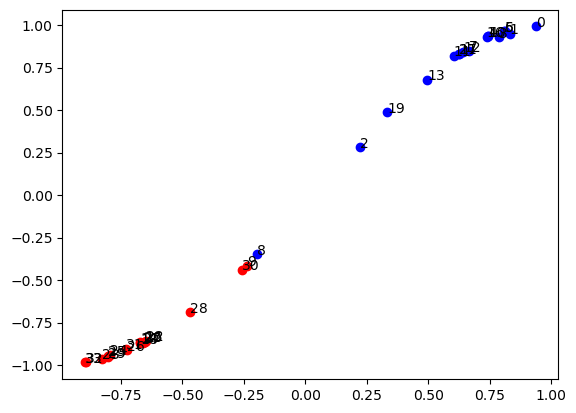

クラスタリング結果


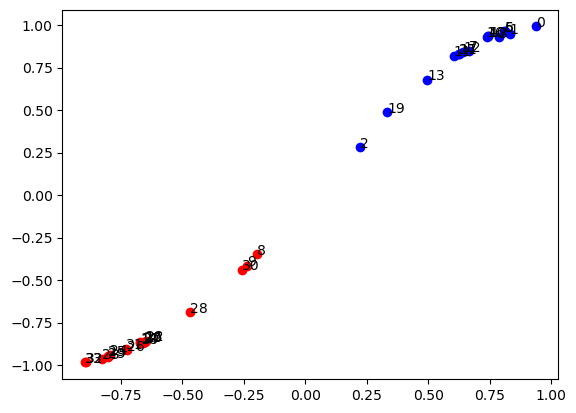

5回目 ARI : 0.8822575413558222
===========================6回目============================
埋め込み結果


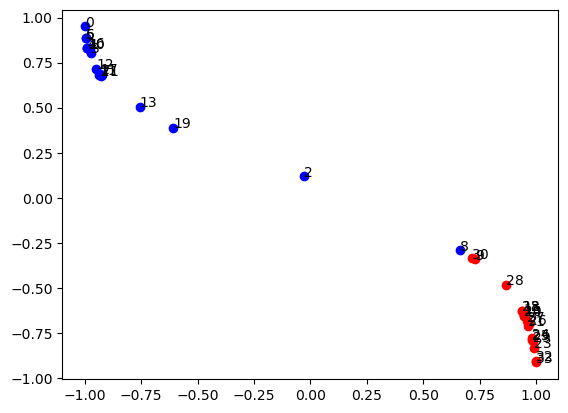

クラスタリング結果


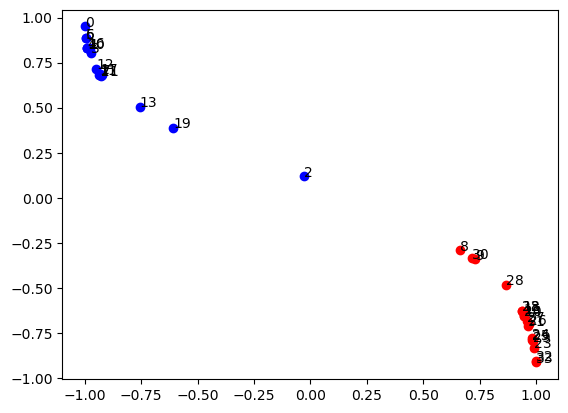

6回目 ARI : 0.8822575413558222
===========================7回目============================
埋め込み結果


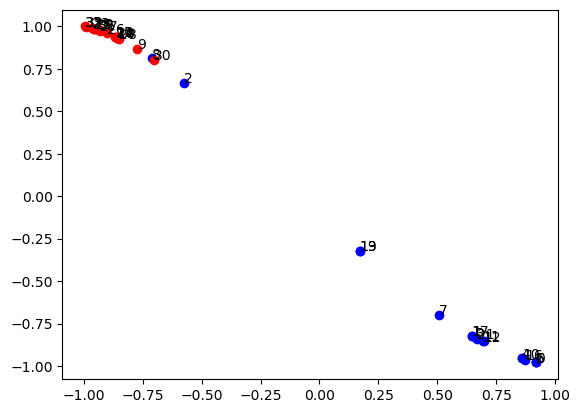

クラスタリング結果


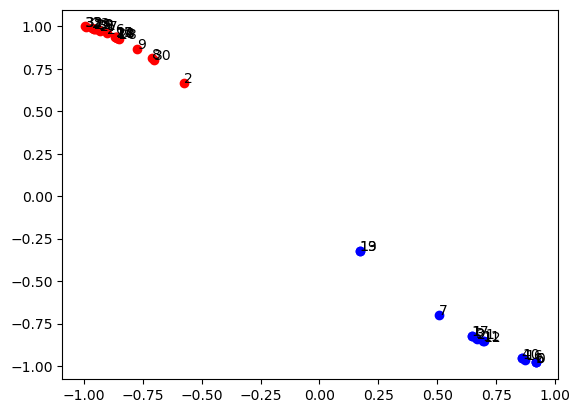

7回目 ARI : 0.7717250324254216
===========================8回目============================
埋め込み結果


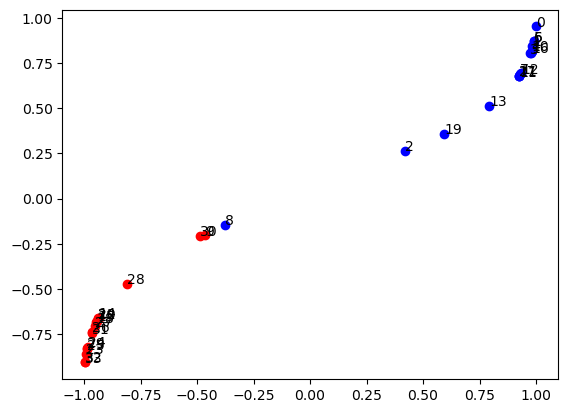

クラスタリング結果


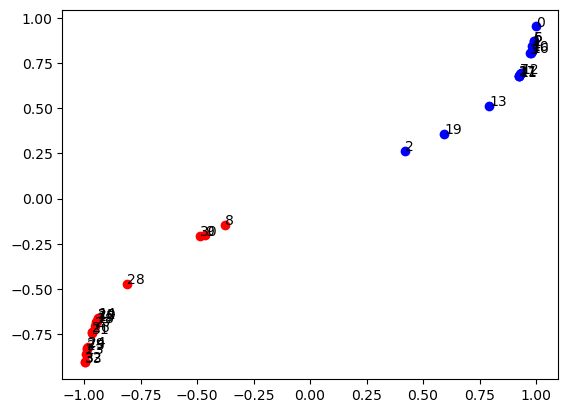

8回目 ARI : 0.8822575413558222
===========================9回目============================
埋め込み結果


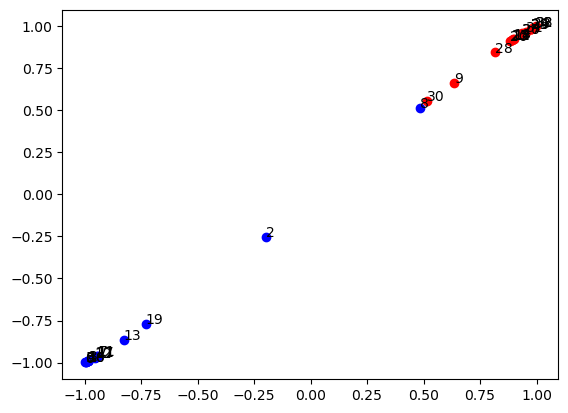

クラスタリング結果


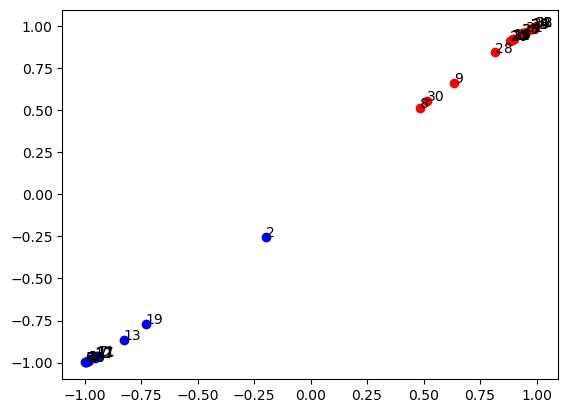

9回目 ARI : 0.8822575413558222
===========================10回目============================
埋め込み結果


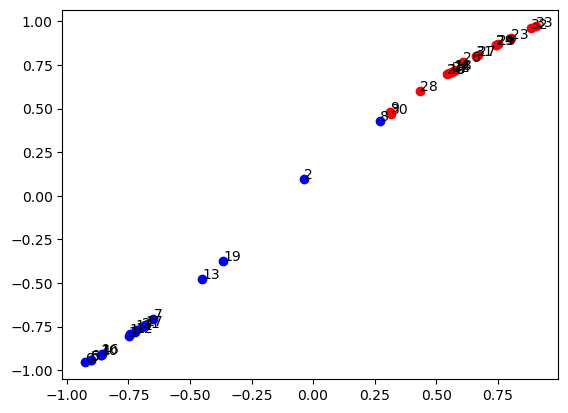

クラスタリング結果


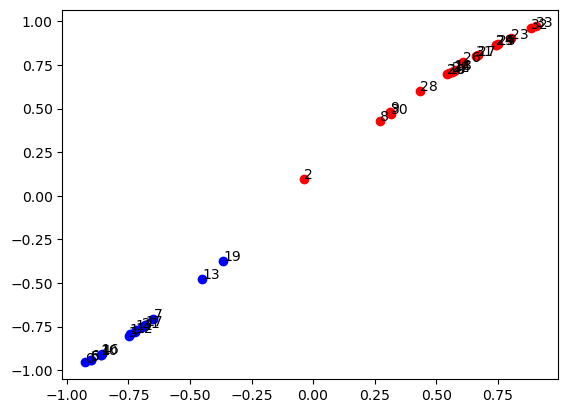

10回目 ARI : 0.7717250324254216
===========================11回目============================
埋め込み結果


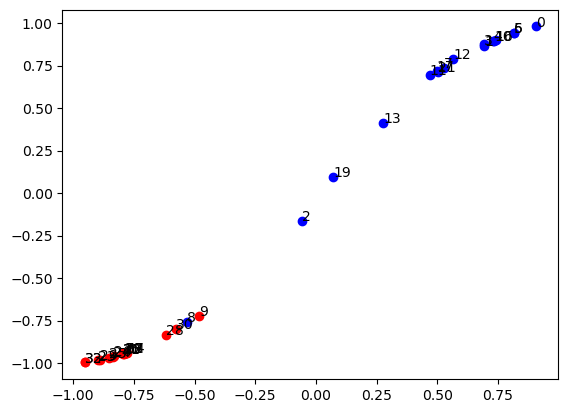

クラスタリング結果


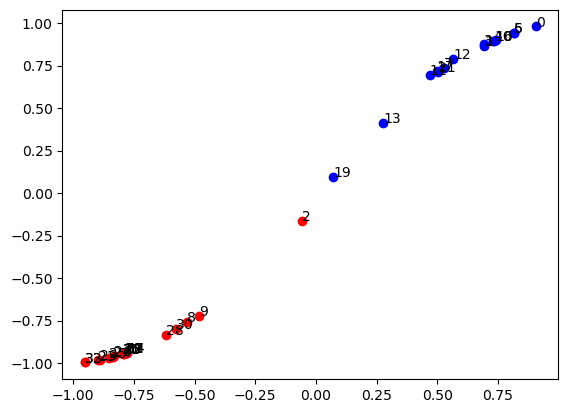

11回目 ARI : 0.7717250324254216
===========================12回目============================
埋め込み結果


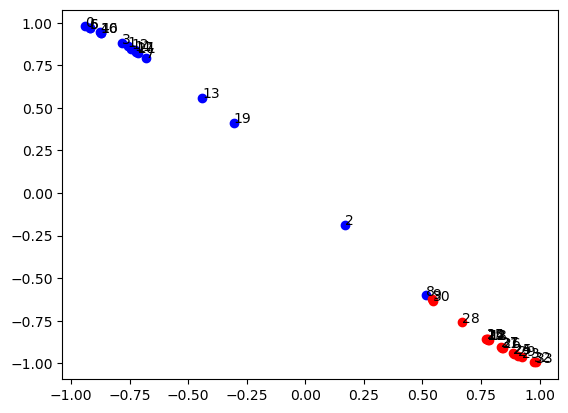

クラスタリング結果


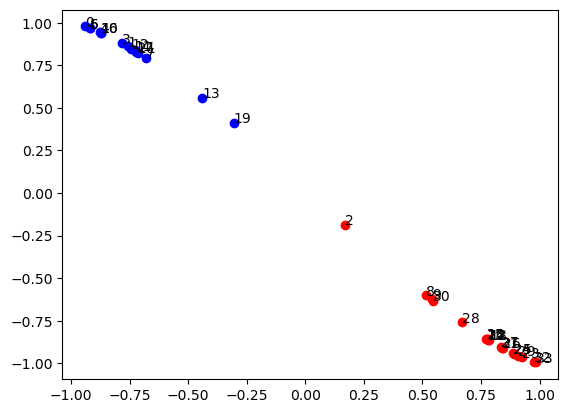

12回目 ARI : 0.7717250324254216
===========================13回目============================
埋め込み結果


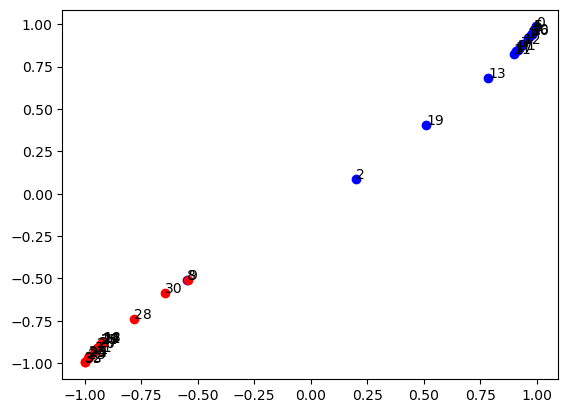

クラスタリング結果


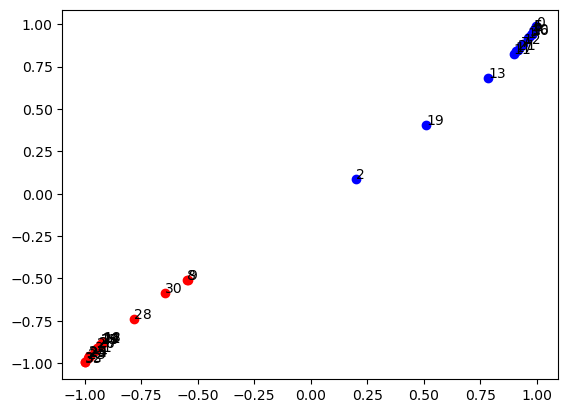

13回目 ARI : 0.8822575413558222
===========================14回目============================
埋め込み結果


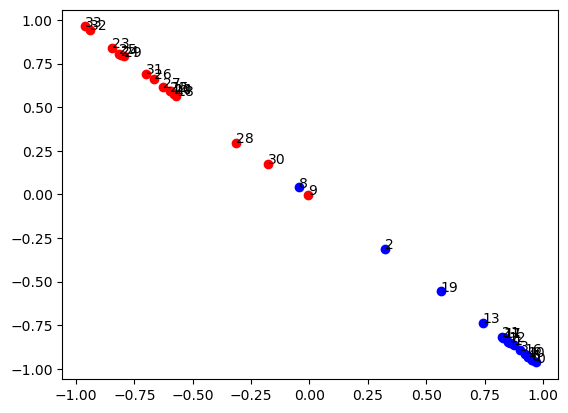

クラスタリング結果


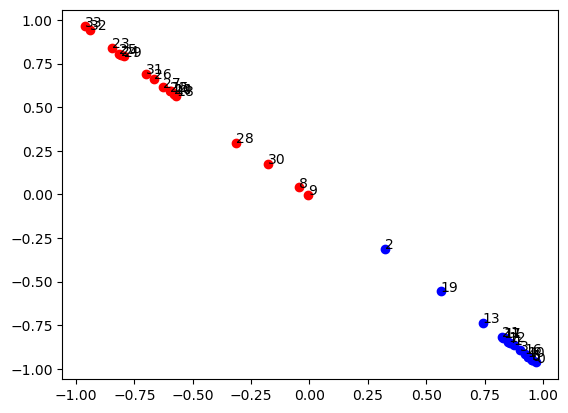

14回目 ARI : 0.8822575413558222
===========================15回目============================
埋め込み結果


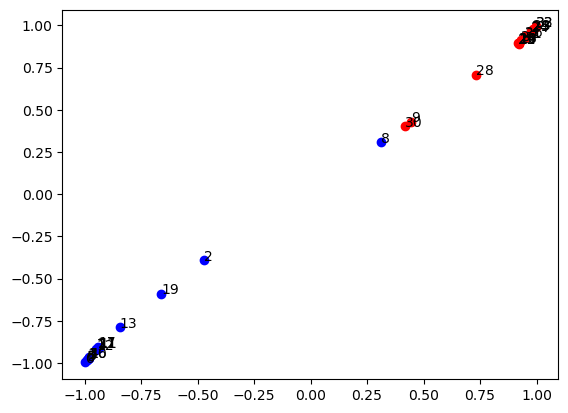

クラスタリング結果


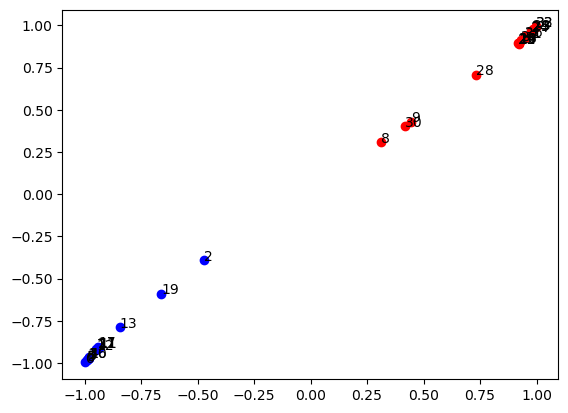

15回目 ARI : 0.8822575413558222
===========================16回目============================
埋め込み結果


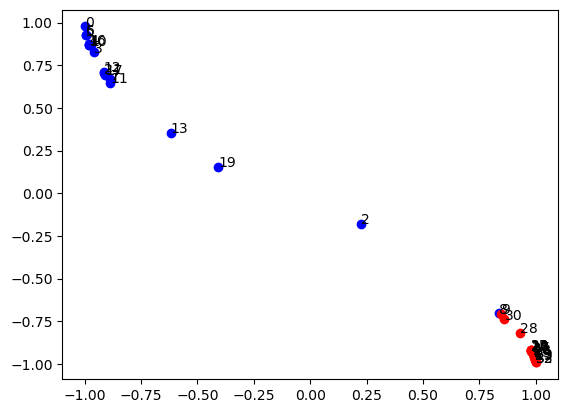

クラスタリング結果


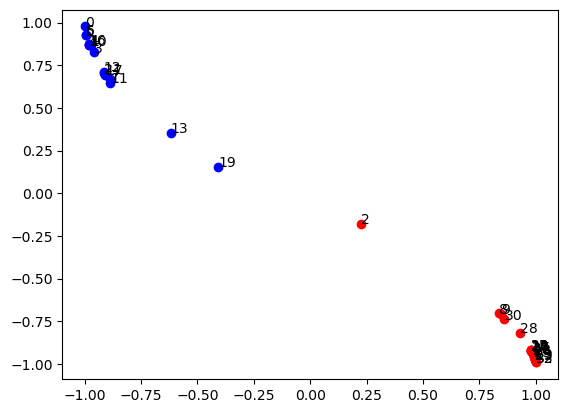

16回目 ARI : 0.7717250324254216
===========================17回目============================
埋め込み結果


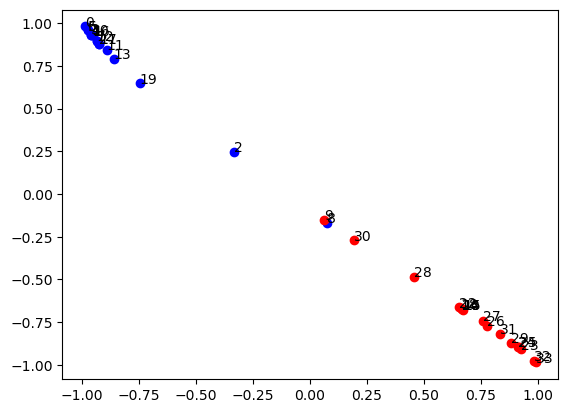

クラスタリング結果


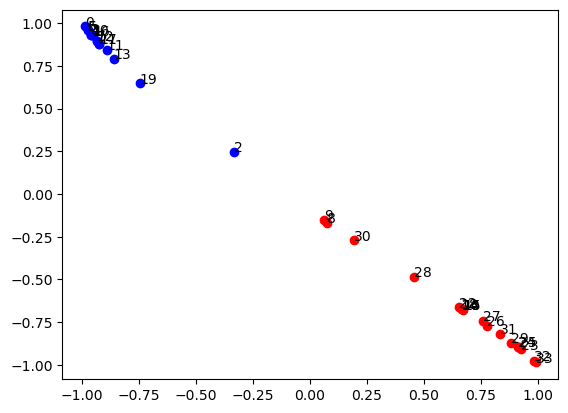

17回目 ARI : 0.8822575413558222
===========================18回目============================
埋め込み結果


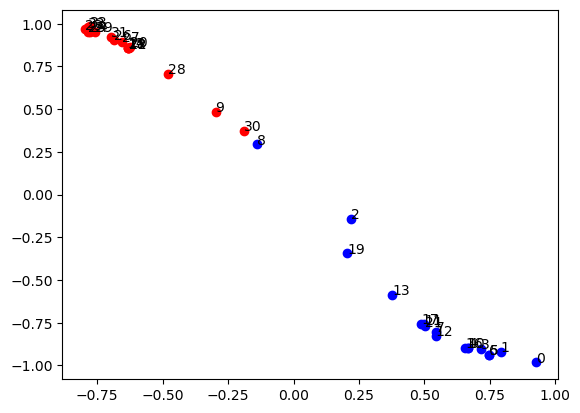

クラスタリング結果


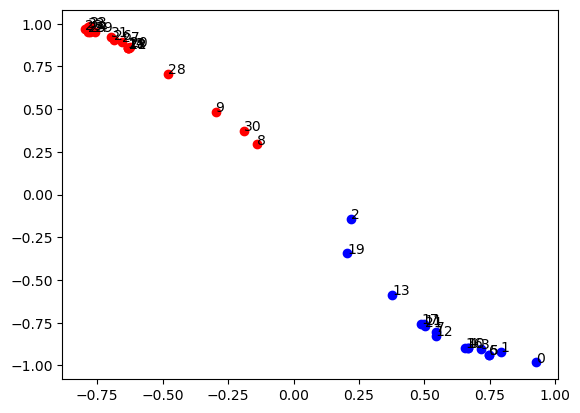

18回目 ARI : 0.8822575413558222
===========================19回目============================
埋め込み結果


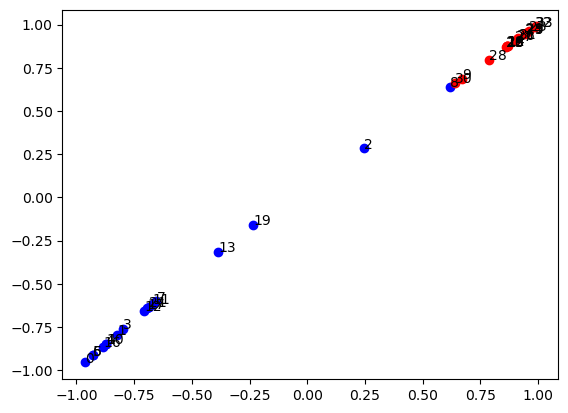

クラスタリング結果


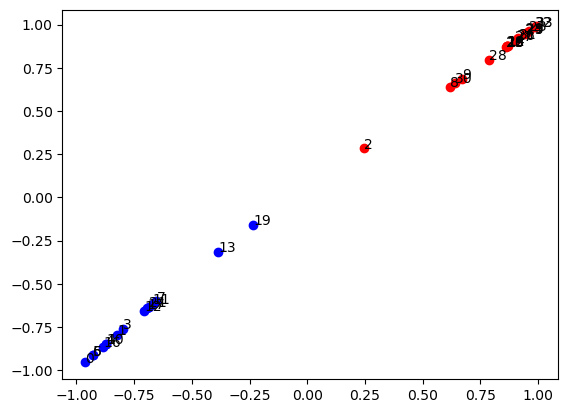

19回目 ARI : 0.7717250324254216
===========================20回目============================
埋め込み結果


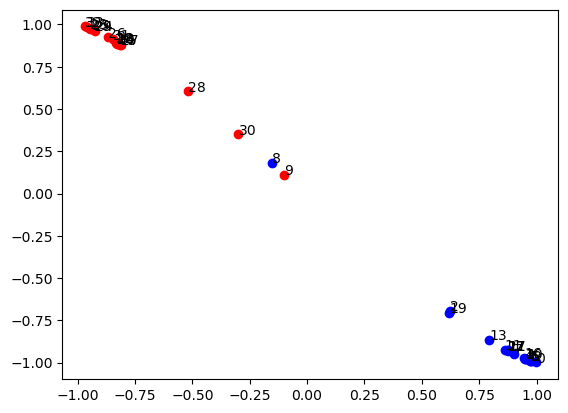

クラスタリング結果


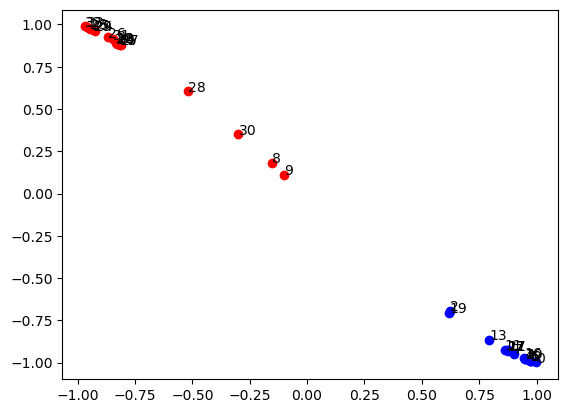

20回目 ARI : 0.8822575413558222
===========================21回目============================
埋め込み結果


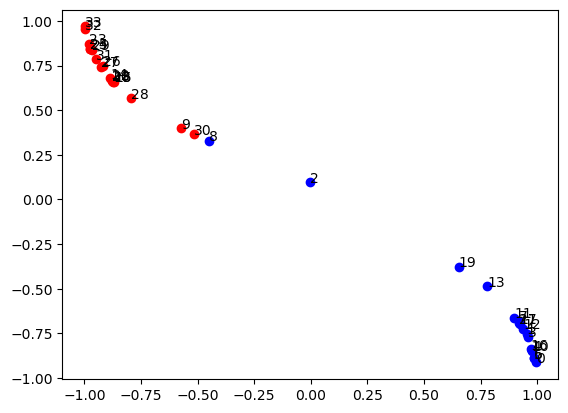

クラスタリング結果


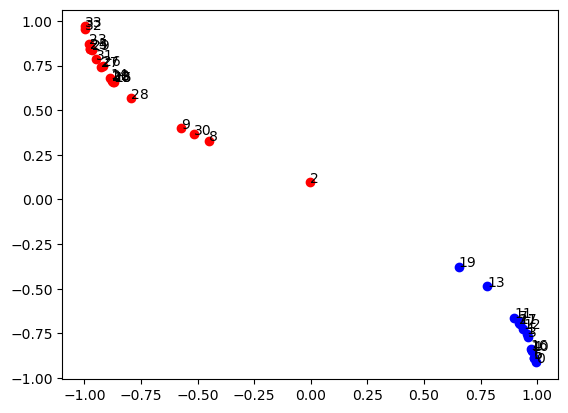

21回目 ARI : 0.7717250324254216
===========================22回目============================
埋め込み結果


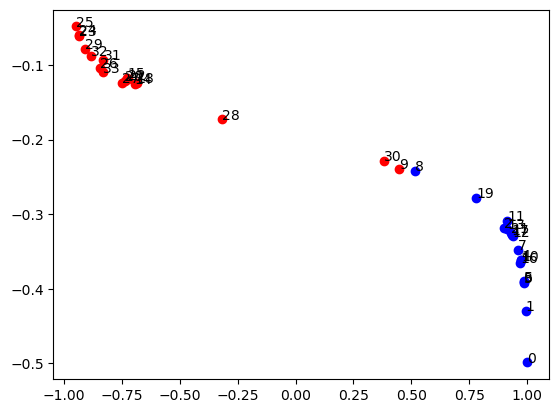

クラスタリング結果


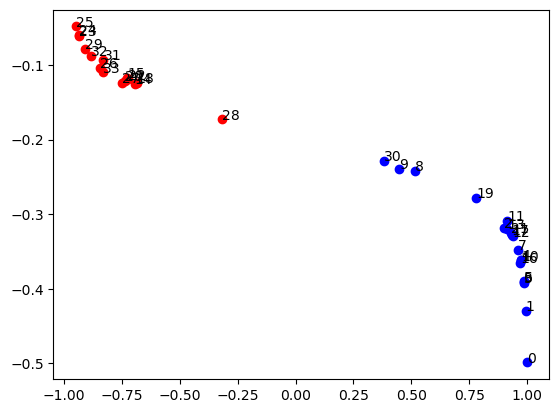

22回目 ARI : 0.7717250324254216
===========================23回目============================
埋め込み結果


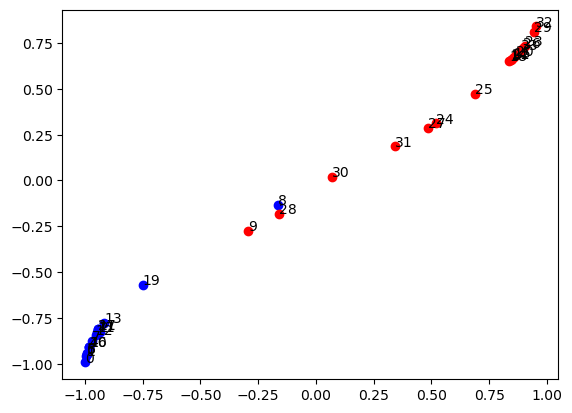

クラスタリング結果


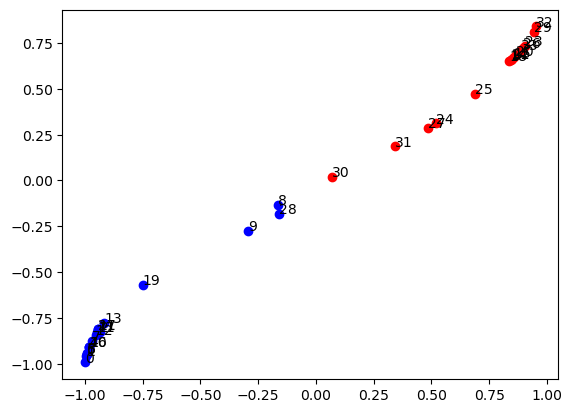

23回目 ARI : 0.7717250324254216
===========================24回目============================
埋め込み結果


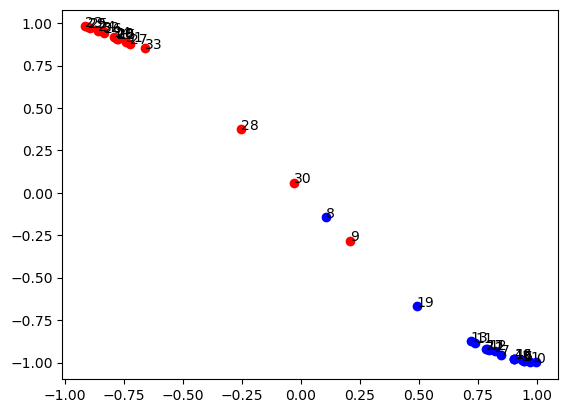

クラスタリング結果


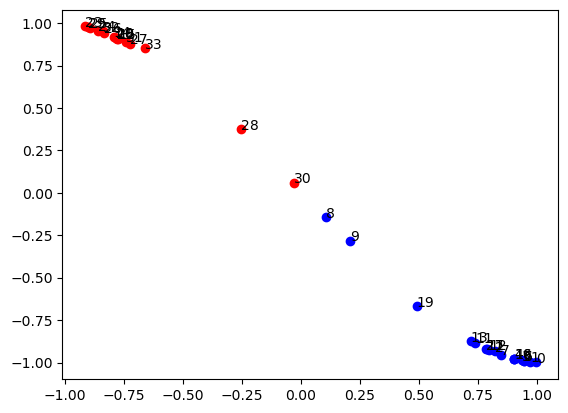

24回目 ARI : 0.8822575413558222
===========================25回目============================
埋め込み結果


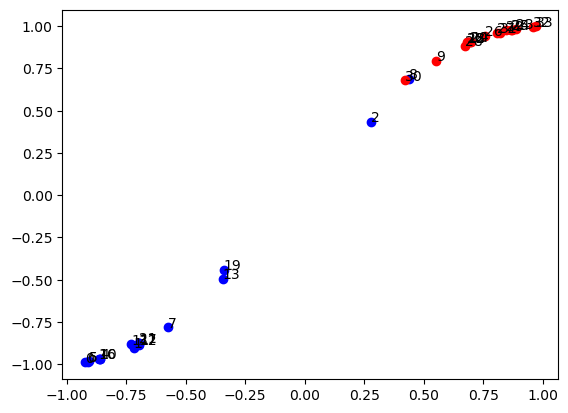

クラスタリング結果


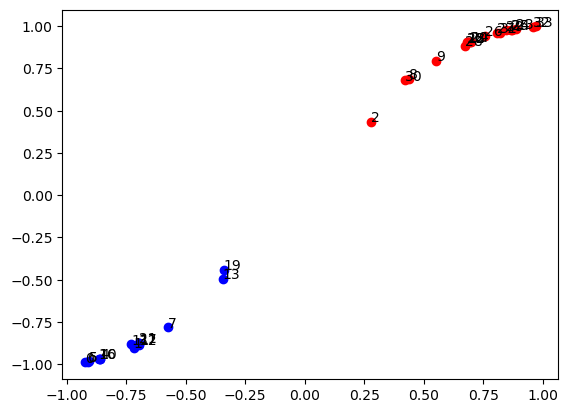

25回目 ARI : 0.7717250324254216
===========================26回目============================
埋め込み結果


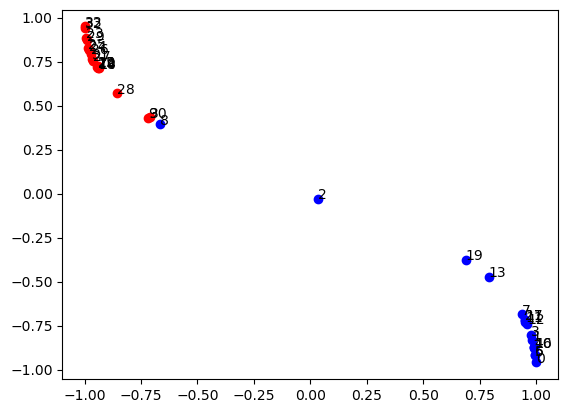

クラスタリング結果


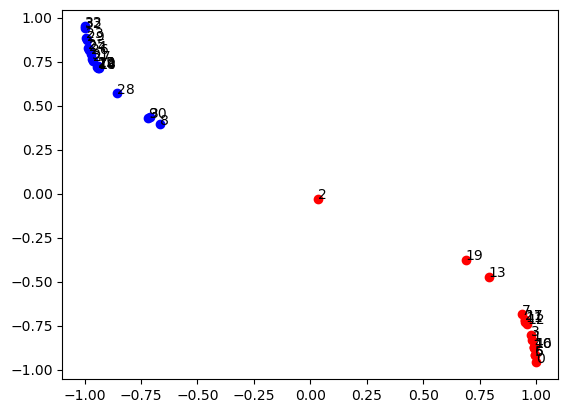

26回目 ARI : 0.8822575413558222
===========================27回目============================
埋め込み結果


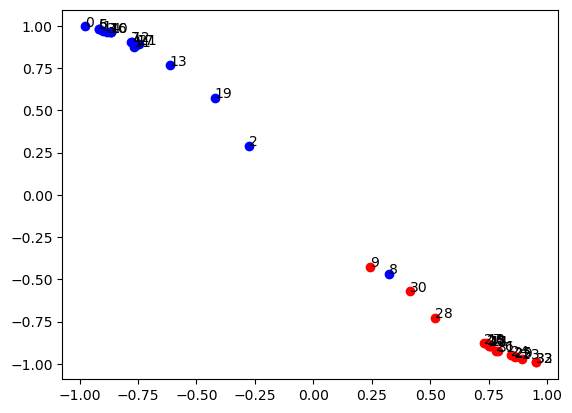

クラスタリング結果


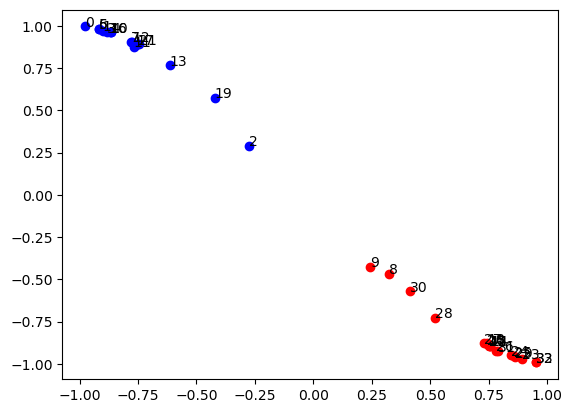

27回目 ARI : 0.8822575413558222
===========================28回目============================
埋め込み結果


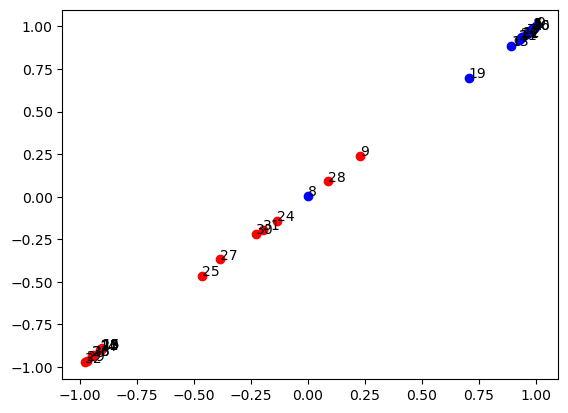

クラスタリング結果


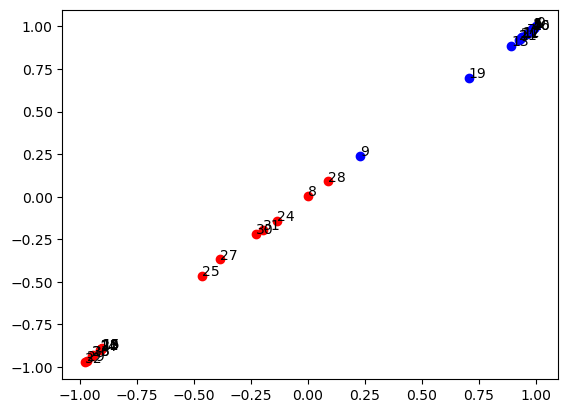

28回目 ARI : 0.7716262975778547
===========================29回目============================
埋め込み結果


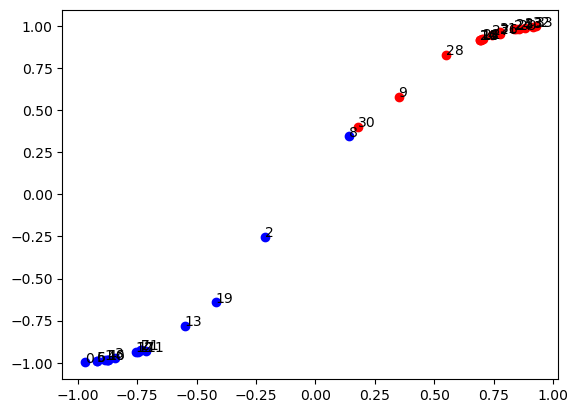

クラスタリング結果


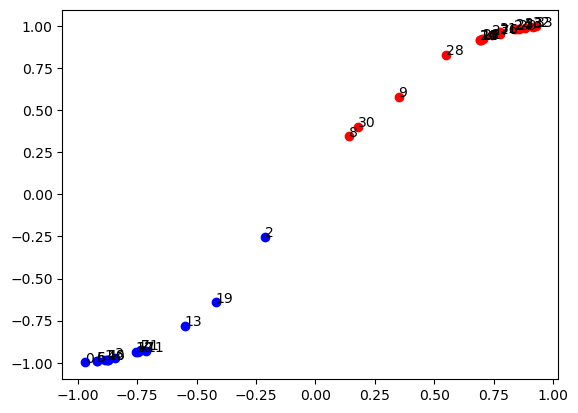

29回目 ARI : 0.8822575413558222
===========================30回目============================
埋め込み結果


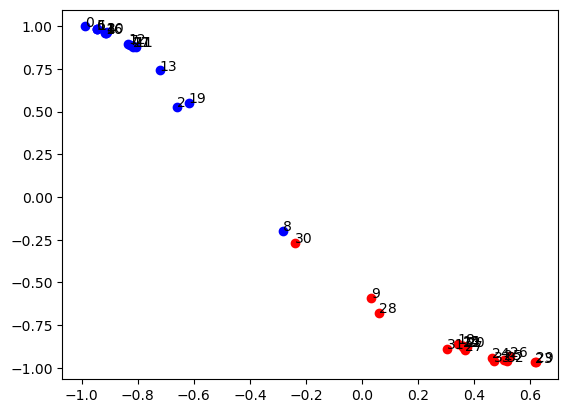

クラスタリング結果


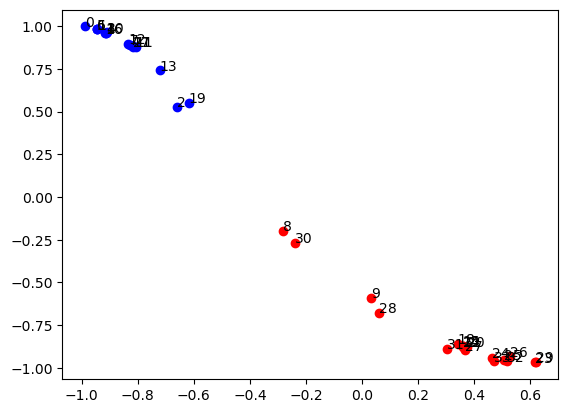

30回目 ARI : 0.8822575413558222
===========================31回目============================
埋め込み結果


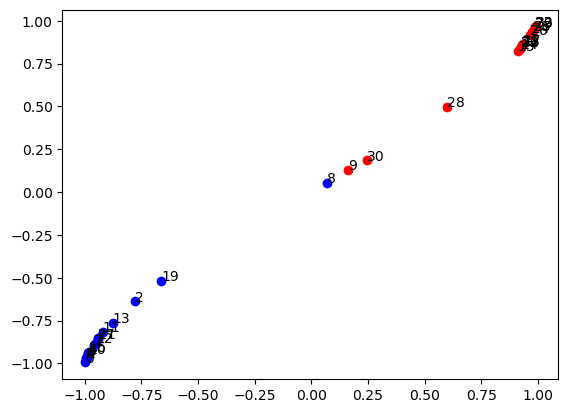

クラスタリング結果


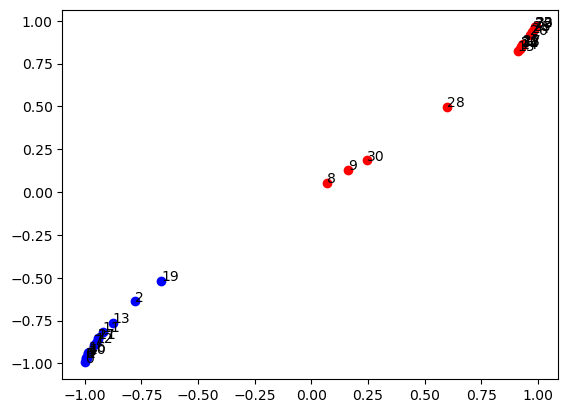

31回目 ARI : 0.8822575413558222
===========================32回目============================
埋め込み結果


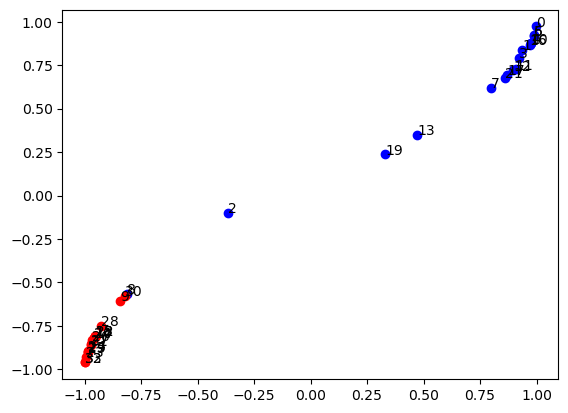

クラスタリング結果


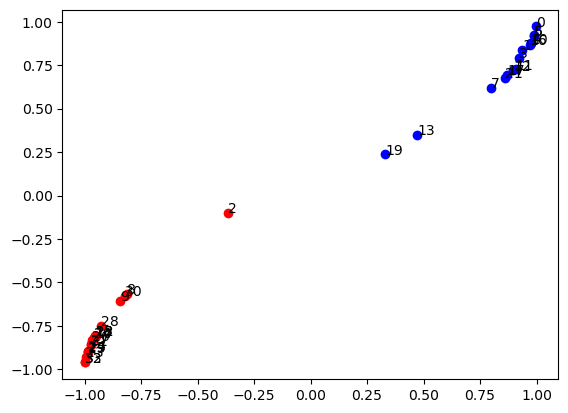

32回目 ARI : 0.7717250324254216
===========================33回目============================
埋め込み結果


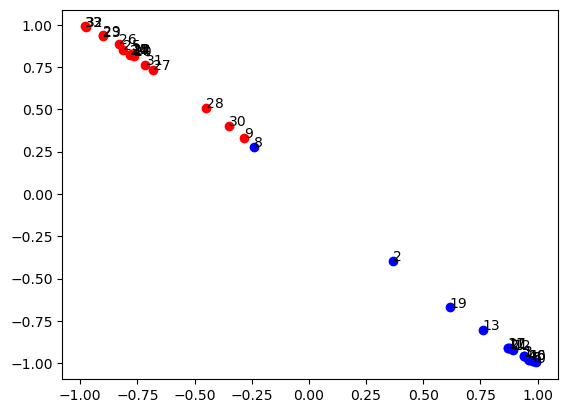

クラスタリング結果


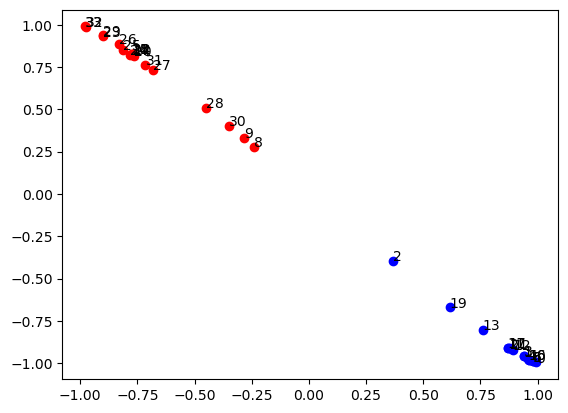

33回目 ARI : 0.8822575413558222
===========================34回目============================
埋め込み結果


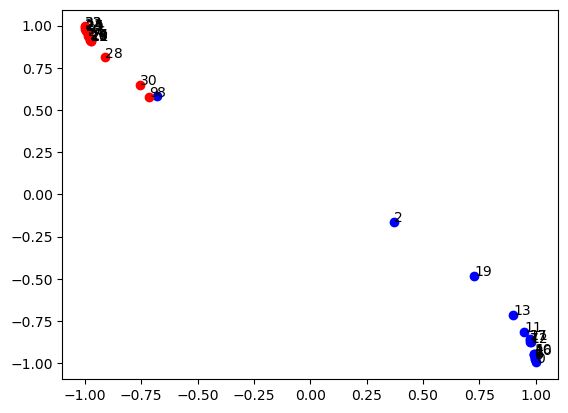

クラスタリング結果


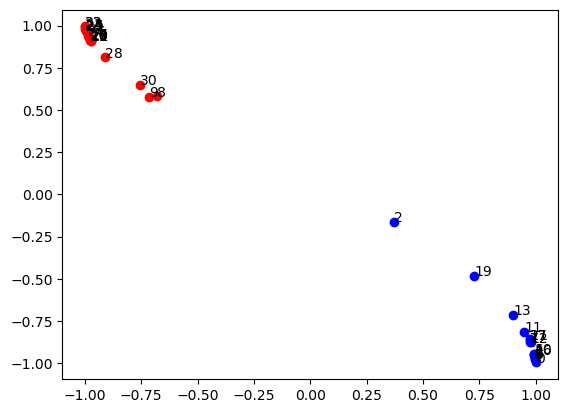

34回目 ARI : 0.8822575413558222
===========================35回目============================
埋め込み結果


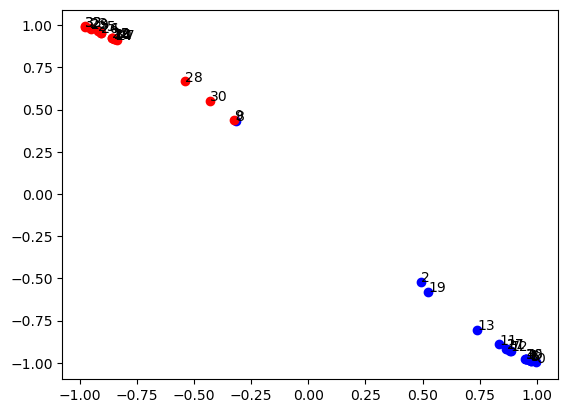

クラスタリング結果


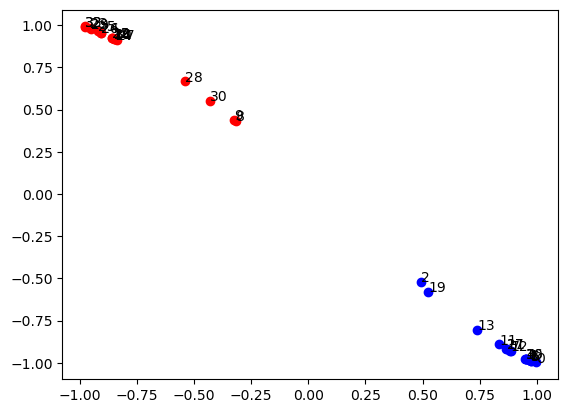

35回目 ARI : 0.8822575413558222
===========================36回目============================
埋め込み結果


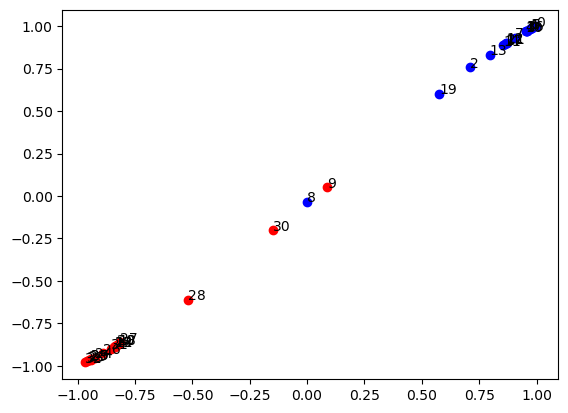

クラスタリング結果


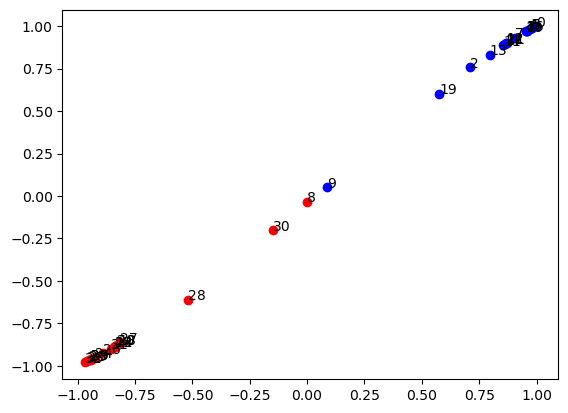

36回目 ARI : 0.7716262975778547
===========================37回目============================
埋め込み結果


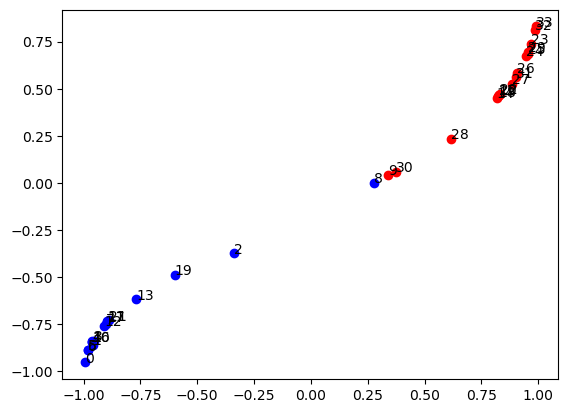

クラスタリング結果


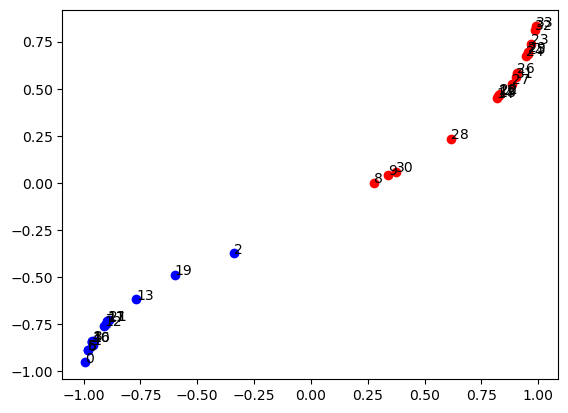

37回目 ARI : 0.8822575413558222
===========================38回目============================
埋め込み結果


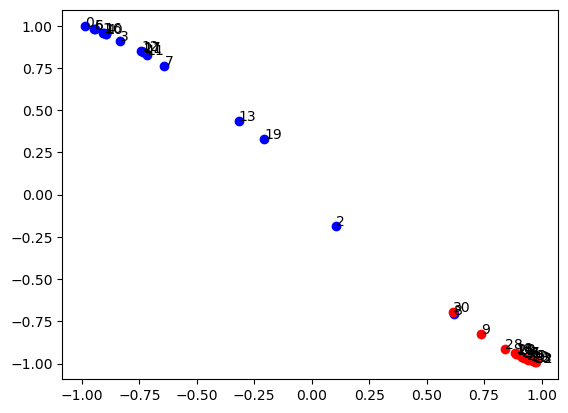

クラスタリング結果


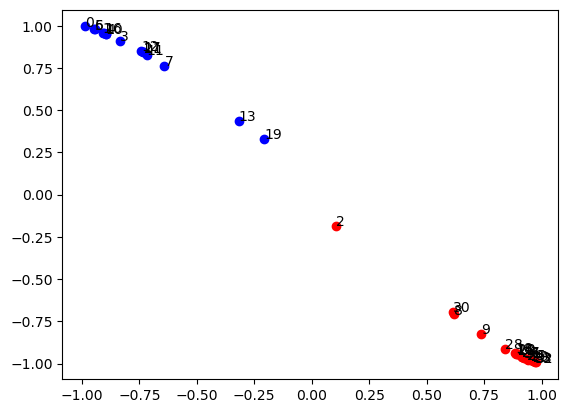

38回目 ARI : 0.7717250324254216
===========================39回目============================
埋め込み結果


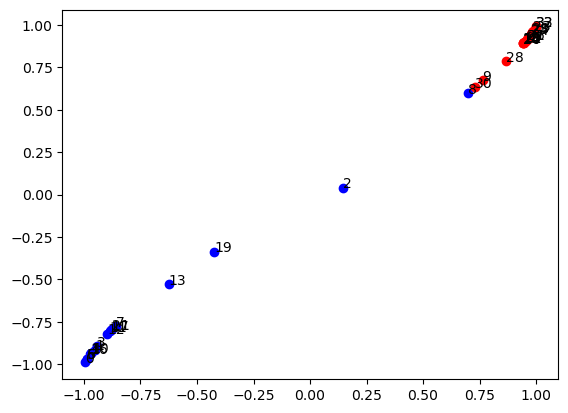

クラスタリング結果


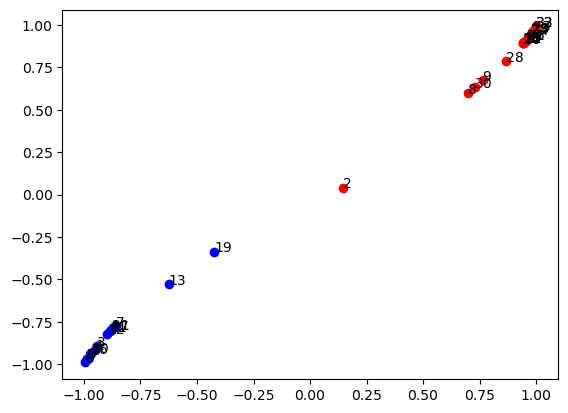

39回目 ARI : 0.7717250324254216
===========================40回目============================
埋め込み結果


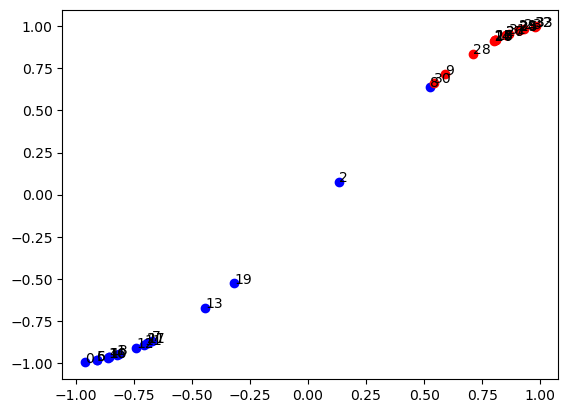

クラスタリング結果


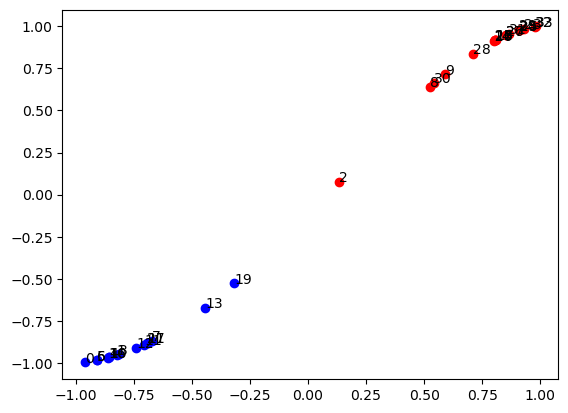

40回目 ARI : 0.7717250324254216
===========================41回目============================
埋め込み結果


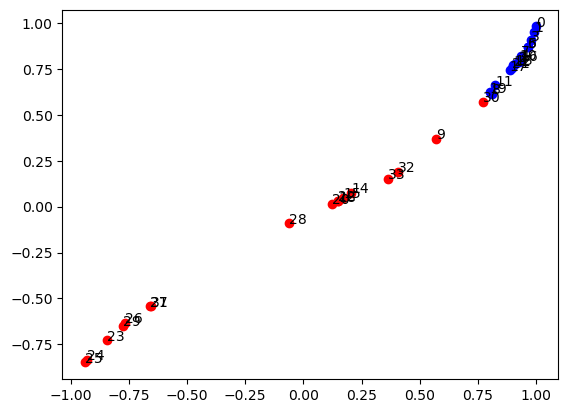

クラスタリング結果


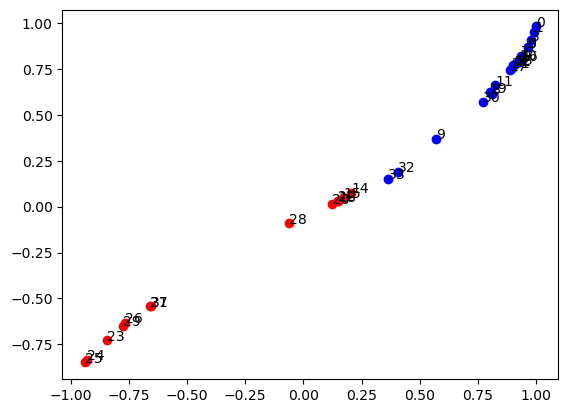

41回目 ARI : 0.572538860103627
===========================42回目============================
埋め込み結果


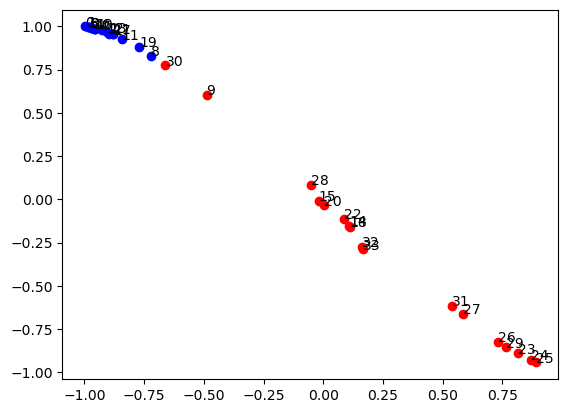

クラスタリング結果


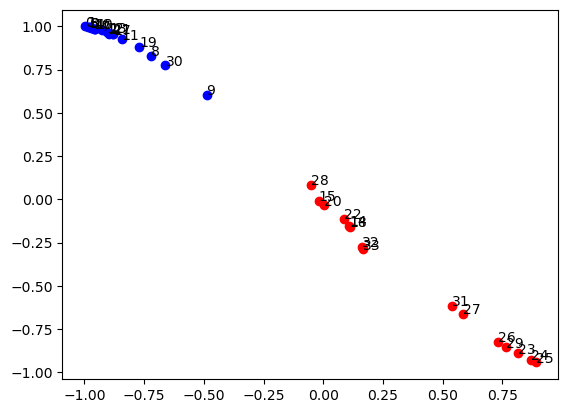

42回目 ARI : 0.7717250324254216
===========================43回目============================
埋め込み結果


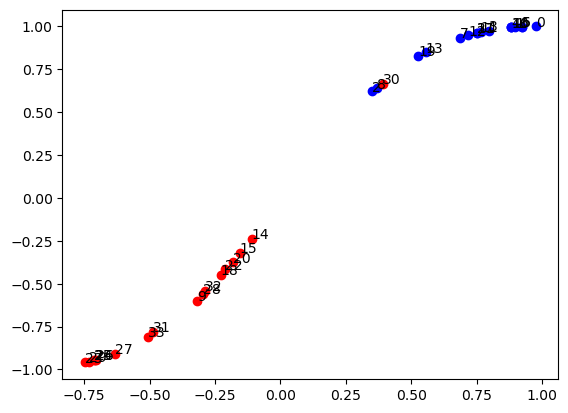

クラスタリング結果


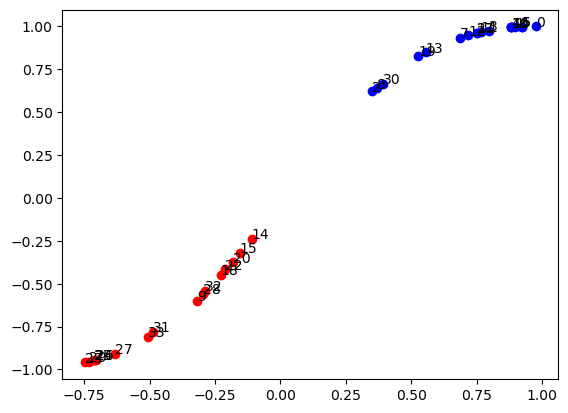

43回目 ARI : 0.8822575413558222
===========================44回目============================
埋め込み結果


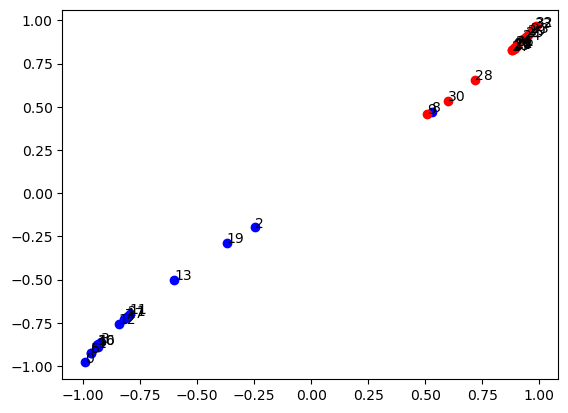

クラスタリング結果


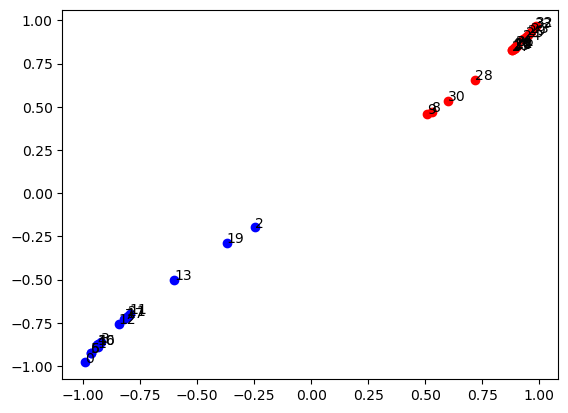

44回目 ARI : 0.8822575413558222
===========================45回目============================
埋め込み結果


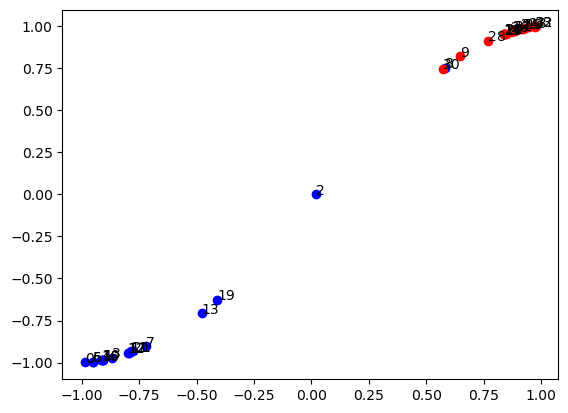

クラスタリング結果


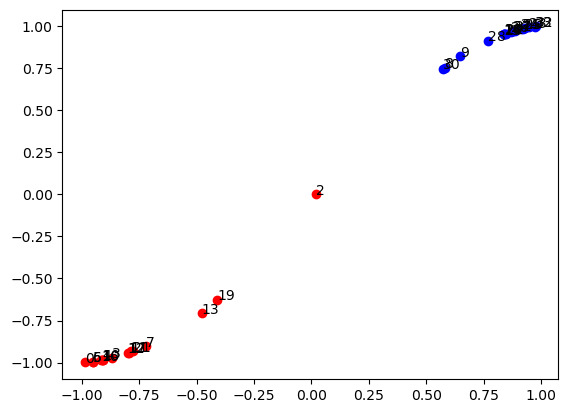

45回目 ARI : 0.8822575413558222
===========================46回目============================
埋め込み結果


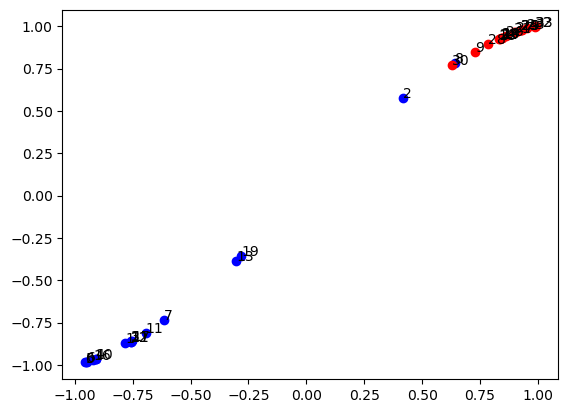

クラスタリング結果


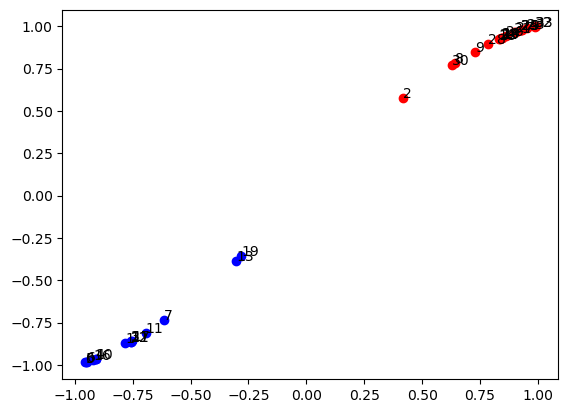

46回目 ARI : 0.7717250324254216
===========================47回目============================
埋め込み結果


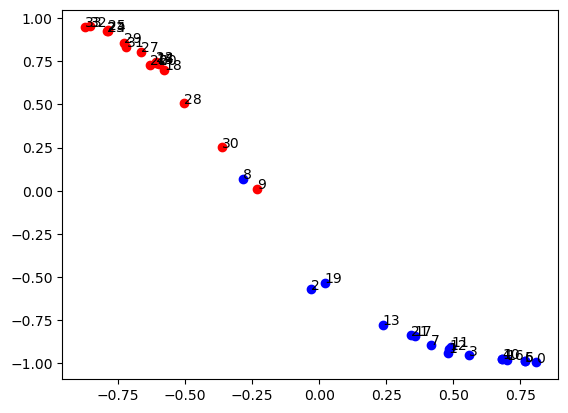

クラスタリング結果


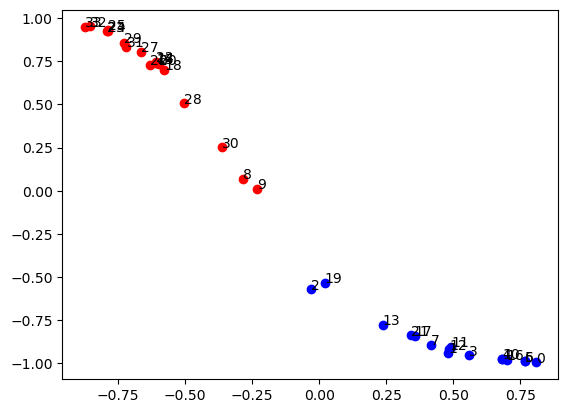

47回目 ARI : 0.8822575413558222
===========================48回目============================
埋め込み結果


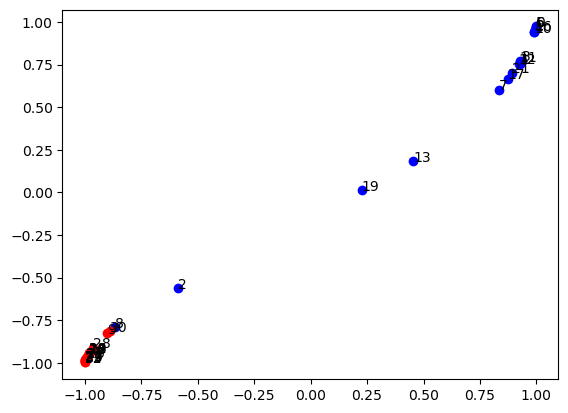

クラスタリング結果


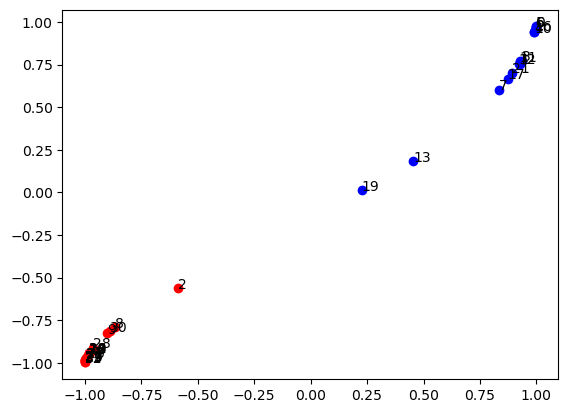

48回目 ARI : 0.7717250324254216
===========================49回目============================
埋め込み結果


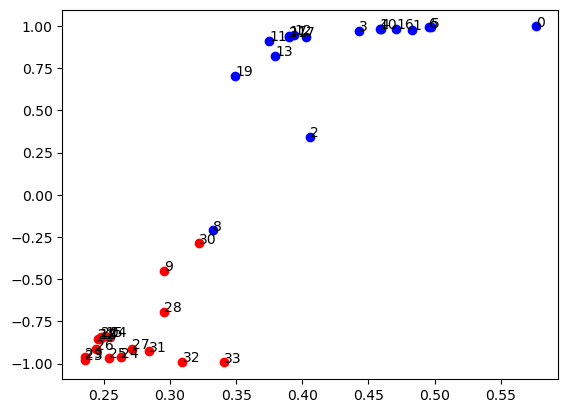

クラスタリング結果


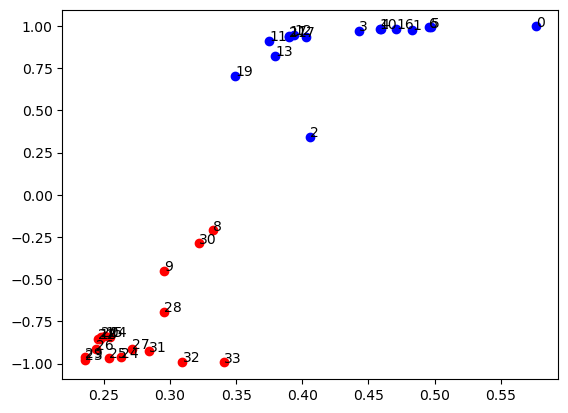

49回目 ARI : 0.8822575413558222
===========================50回目============================
埋め込み結果


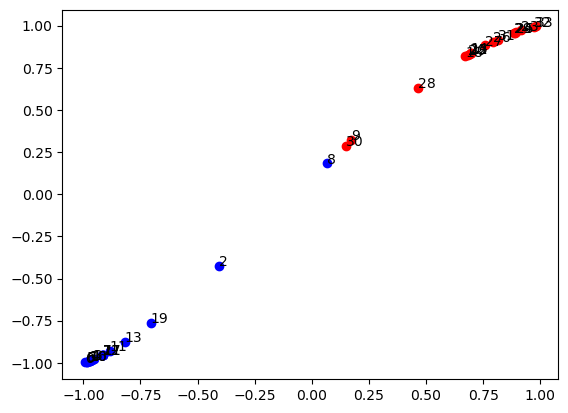

クラスタリング結果


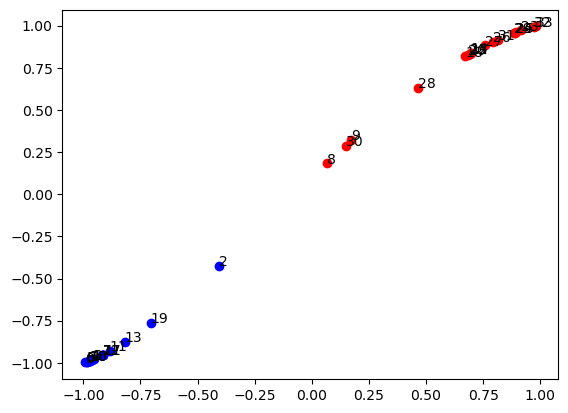

50回目 ARI : 0.8822575413558222
最大ARI([1, 3, 5, 6, 8, 9, 13, 14, 15, 17, 18, 20, 24, 26, 27, 29, 30, 31, 33, 34, 35, 37, 43, 44, 45, 47, 49, 50]回目実行) : 0.8822575413558222
最小ARI([41]回目実行) : 0.572538860103627
平均ARI : 0.8296355645861072
標準偏差 : 0.06609854406331837


In [4]:

ARI_list, max_EVM, min_EVM, max_pred, min_pred = gcn.exec_to_kmedoids(TIMES, TRAIN_ALL, DEFAULT, NUM_TRAIN, EPOCH,VIEW_TRAIN, VIEW_CLUSTERING, N_CLUSTER, TRUE_LABEL, METHOD, DATA)



GCN kmedoids

In [5]:
name = "gcn_"+str(N_CLUSTER)+".txt"
with open(name,'w') as f:
    for i in range(len(max_pred)):
        if i+1 == len(max_pred):
            f.write(str(max_pred[i]))
        else:
            f.write(str(max_pred[i])+',')
